Caminho mais rápido para a cliente alucinada chegar à loja: P1 -> D -> G -> LOJA
Distância total percorrida: 24 km


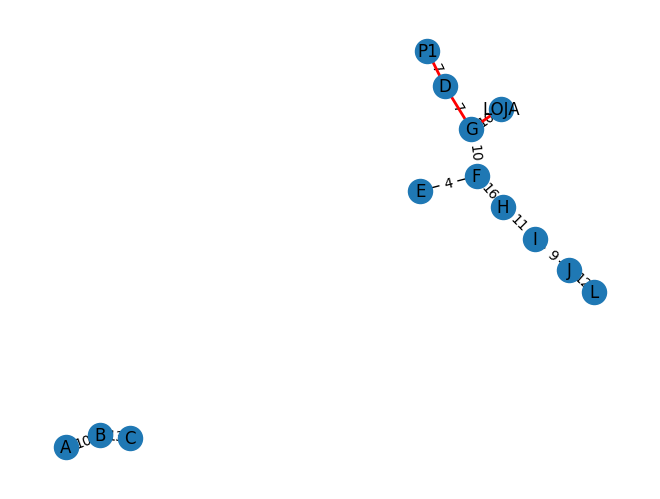

In [1]:

import networkx as nx
import matplotlib.pyplot as plt

def create_graph():
    # Criando o grafo
    G = nx.Graph()

    # Adicionando as arestas com seus pesos (distâncias)
    arestas = [
        ("A", "B", 10),
        ("B", "C", 13),
        ("P1", "D", 7),
        ("D", "G", 7),
        ("G", "LOJA", 10),
        ("E", "F", 4),
        ("F", "G", 10),
        ("F", "H", 16),
        ("H", "I", 11),
        ("I", "J", 9),
        ("J", "L", 12),
    ]
    for u, v, d in arestas:
        G.add_edge(u, v, weight=d)

    return G

def visualize_graph(G, shortest_path=None):
    # Visualizando o grafo
    pos = nx.spring_layout(G)  # Posicionamento dos vértices
    labels = nx.get_edge_attributes(G, 'weight')  # Rótulos das arestas

    nx.draw(G, pos, with_labels=True, arrows=True)
    nx.draw_networkx_edge_labels(G, pos, labels)

    # Destacando o caminho mais curto, se fornecido
    if shortest_path:
        edges = [(shortest_path[i], shortest_path[i+1]) for i in range(len(shortest_path)-1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)

    # Exibindo a figura
    plt.show()

def main():
    # Criando o grafo
    G = create_graph()

    # Obtendo a localização da cliente alucinada e da loja
    P1 = input("Digite a localização da cliente alucinada: ").upper()
    LOJA = input("Digite a localização da loja: ").upper()

    try:
        # Calculando o caminho mais curto para a cliente alucinada chegar à loja
        shortest_path = nx.shortest_path(G, source=P1, target=LOJA, weight='weight')
        shortest_path_distance = nx.shortest_path_length(G, source=P1, target=LOJA, weight='weight')

        # Imprimindo o caminho e a distância
        print(f"Caminho mais rápido para a cliente alucinada chegar à loja: {' -> '.join(shortest_path)}")
        print(f"Distância total percorrida: {shortest_path_distance} km")

        # Visualizando o grafo com destaque para o caminho mais curto
        visualize_graph(G, shortest_path)

    except nx.NetworkXNoPath:
        print("Não foi possível encontrar um caminho entre as cidades fornecidas.")

if __name__ == "__main__":
    main()